###**Phishing Websites Prediction Using Machine Learning**


Phishing websites are a major cybersecurity threat, designed to deceive users into revealing sensitive information by mimicking legitimate platforms. Traditional rule-based and blacklist-based detection methods often fail to identify newly created phishing sites due to their dynamic and evolving nature.

Machine learning provides an effective solution by automatically learning patterns from website features and enabling accurate classification of phishing and legitimate websites. This study applies machine learning techniques to improve phishing website prediction and enhance online security.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

### Import Dataset

In [2]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Basic Dataset Overview

In [3]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Column names
print("Columns:\n", df.columns)

# Data types
df.info()

Dataset Shape: (11055, 32)
Columns:
 Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2 

In [4]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis

### Target Class Distribution

/tmp/ipython-input-357949169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


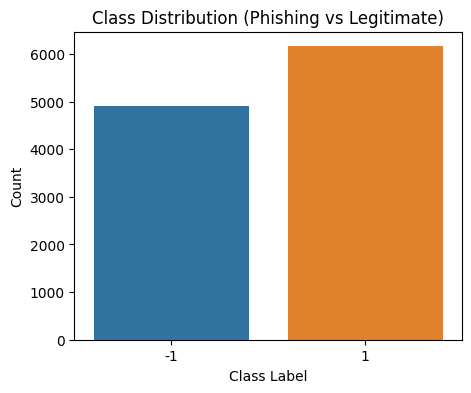

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(
    x='Result',
    data=df,
    palette=['#1f77b4', '#ff7f0e']   # Blue & Orange
)
plt.title("Class Distribution (Phishing vs Legitimate)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

### Feature Distribution

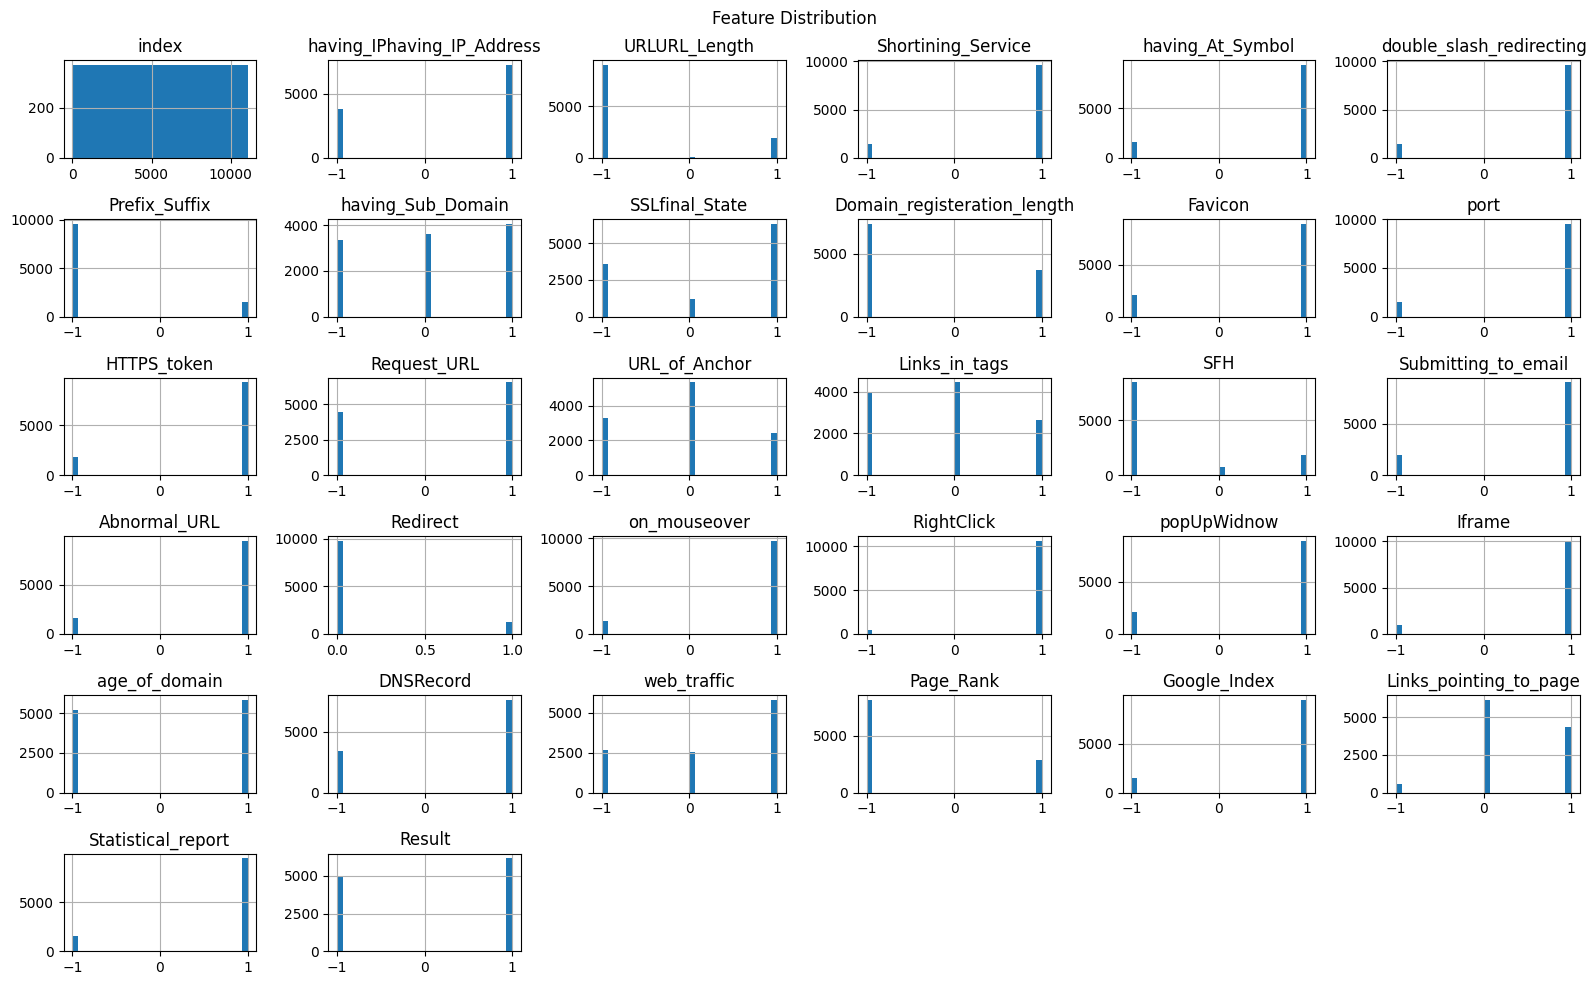

In [13]:
df.hist(figsize=(16,10), bins=30)
plt.suptitle("Feature Distribution")
plt.tight_layout()
plt.show()

### Correlation Analysis

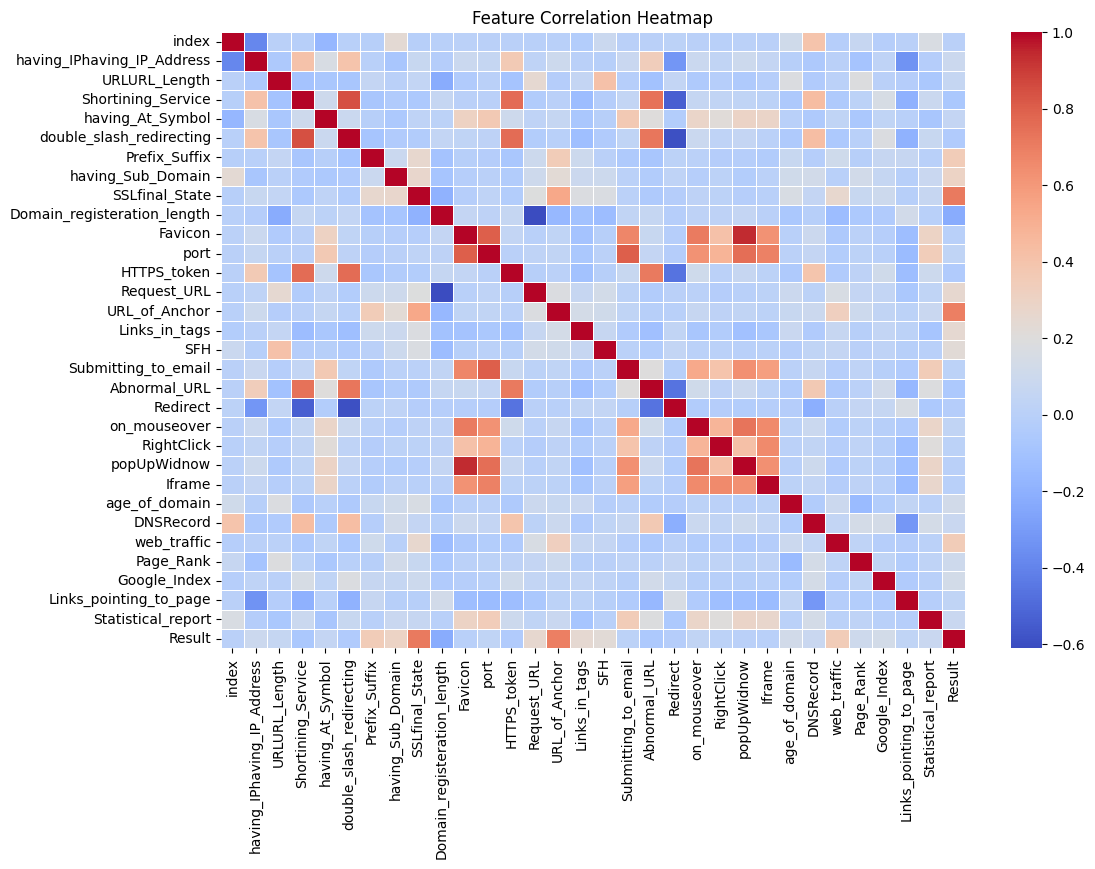

In [18]:
plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature vs Target Relationship

In [24]:
df.groupby('Result').mean().T   # mean feature values grouped by class

Result,-1,1
index,5524.501837,5530.782849
having_IPhaving_IP_Address,0.213557,0.393536
URLURL_Length,-0.682523,-0.593958
Shortining_Service,0.790118,0.697905
having_At_Symbol,0.658228,0.734286
double_slash_redirecting,0.770519,0.718369
Prefix_Suffix,-1.000000,-0.524119
having_Sub_Domain,-0.209473,0.281468
SSLfinal_State,-0.479788,0.832223
Domain_registeration_length,-0.098408,-0.526393


### Missing Value Check

In [21]:
missing = df.isnull().sum()   # Missing values count

missing[missing > 0]  # Only show columns with missing values

,0


### Boxplot (Outlier Detection)

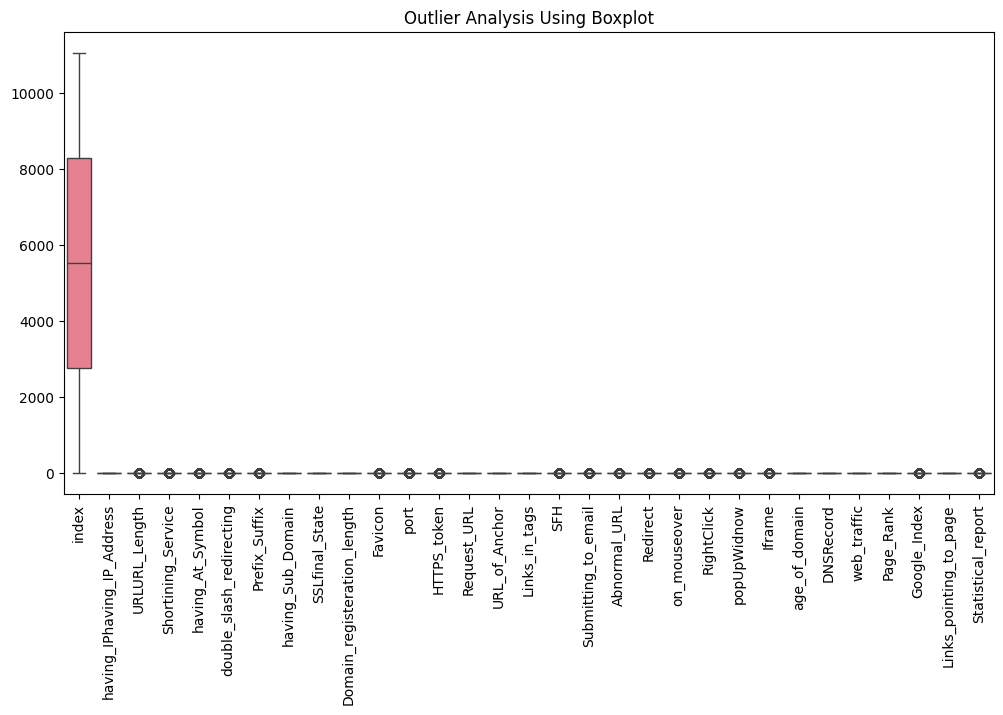

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Result']))
plt.xticks(rotation=90)
plt.title("Outlier Analysis Using Boxplot")
plt.show()

### Data Preprocessing

### Seperate Features and Target Variable

In [25]:
x = df.drop(columns=['index', 'Result'])  # features
y = df['Result']   # target variable

### Train dataset using Random Forest Classifiers

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Accuracy Score

In [27]:
pred = model.predict(x_test)
print(pred)

[-1 -1 -1 ... -1  1 -1]


In [28]:
print(accuracy_score(y_test, pred))

0.9669832654907282


### Classification Report

In [29]:
print('Precision is:',precision_score(y_test, pred))
print("Recall is:",recall_score(y_test, pred))
print('F1 Score is:',f1_score(y_test, pred))
print('ROC_AUC Score is:',roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))

Precision is: 0.963166144200627
Recall is: 0.9792828685258964
F1 Score is: 0.9711576451995259
ROC_AUC Score is: 0.9650598443047893
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



### Confusion Matrix

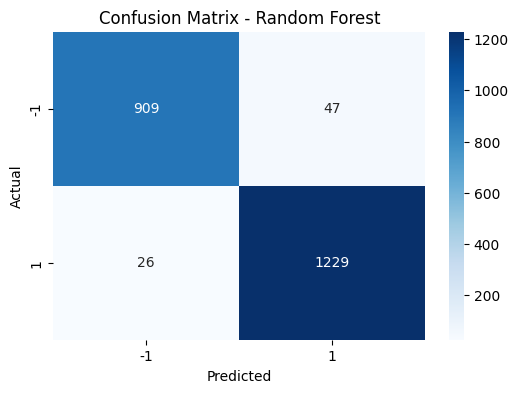

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred, labels=[-1, 1])

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['-1', '1'],
    yticklabels=['-1', '1']
)

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Training Dataset using XGBoost

In [31]:
y_train_xgb = y_train.replace({-1: 0})
y_test_xgb = y_test.replace({-1: 0})

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(x_train, y_train_xgb)
xgb_model.fit(x_train, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
xgb_pred = xgb_model.predict(x_test)
print(xgb_pred)

[0 0 0 ... 0 1 0]


### Evaluation Metrics

In [33]:
xgb_prob = xgb_model.predict_proba(x_test)[:, 1]

print("XGBoost Accuracy:", accuracy_score(y_test_xgb, xgb_pred))
print("Precision:", precision_score(y_test_xgb, xgb_pred))
print("Recall:", recall_score(y_test_xgb, xgb_pred))
print("F1:", f1_score(y_test_xgb, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test_xgb, xgb_prob))
print(classification_report(y_test_xgb, xgb_pred))

XGBoost Accuracy: 0.9665309814563546
Precision: 0.9616888193901486
Recall: 0.9800796812749004
F1: 0.9707971586424625
ROC-AUC: 0.9950599276534031
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



### Confusion Matrix

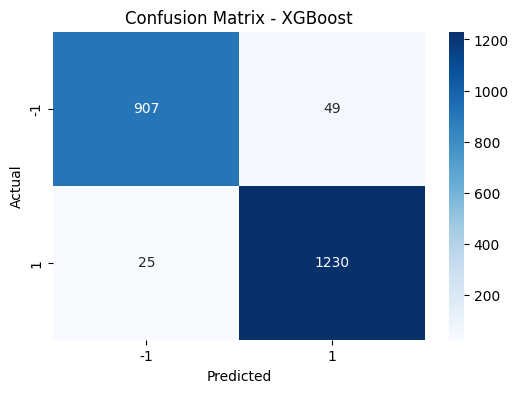

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test_xgb, xgb_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['-1', '1'],
    yticklabels=['-1', '1']
)

plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Train Dataset using Gradient Boosting

In [35]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [36]:
# Prediction
gb_pred = gb_model.predict(x_test)
gb_prob = gb_model.predict_proba(x_test)[:, 1]
print(gb_pred)

[-1 -1 -1 ... -1  1 -1]


### Evaluation Metrics

In [37]:
# Metrics
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Precision:", precision_score(y_test, gb_pred))
print("Recall:", recall_score(y_test, gb_pred))
print("F1:", f1_score(y_test, gb_pred))
print("ROC-AUC:", roc_auc_score(y_test, gb_prob))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.9597467209407508
Precision: 0.9568965517241379
Recall: 0.9729083665338646
F1: 0.964836033188463
ROC-AUC: 0.9926744903232259
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



### Confusion Matrix

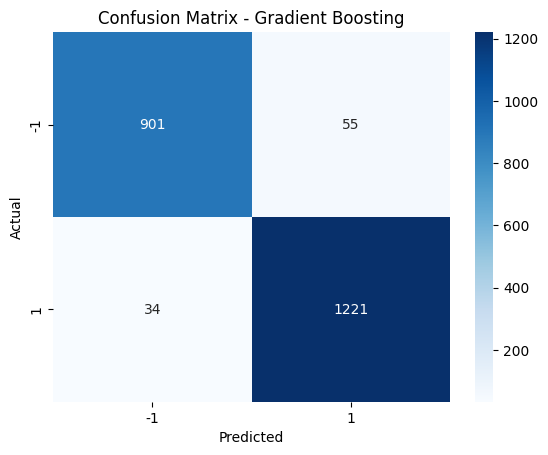

In [38]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, gb_pred, labels=[-1, 1])
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['-1','1'], yticklabels=['-1','1'])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Training Dataset using Adaboost

In [39]:
ada_model = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

ada_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [40]:
# Prediction
ada_pred = ada_model.predict(x_test)
ada_prob = ada_model.predict_proba(x_test)[:, 1]
print(ada_pred)

[-1 -1 -1 ... -1  1 -1]


### Evaluation Metrics

In [41]:
print("Adaboost Accuracy:", accuracy_score(y_test, ada_pred))
print("Precision:", precision_score(y_test, ada_pred))
print("Recall:", recall_score(y_test, ada_pred))
print("F1:", f1_score(y_test, ada_pred))
print("ROC-AUC:", roc_auc_score(y_test, ada_prob))
print(classification_report(y_test, ada_pred))


Adaboost Accuracy: 0.9240162822252375
Precision: 0.9133079847908745
Recall: 0.9569721115537848
F1: 0.9346303501945525
ROC-AUC: 0.9810994515661204
              precision    recall  f1-score   support

          -1       0.94      0.88      0.91       956
           1       0.91      0.96      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



### Confusion Matrix

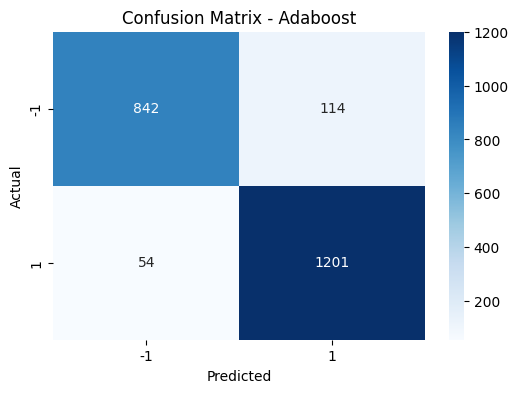

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, ada_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['-1', '1'],
    yticklabels=['-1', '1']
)

plt.title('Confusion Matrix - Adaboost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Random Forest – Feature Importance

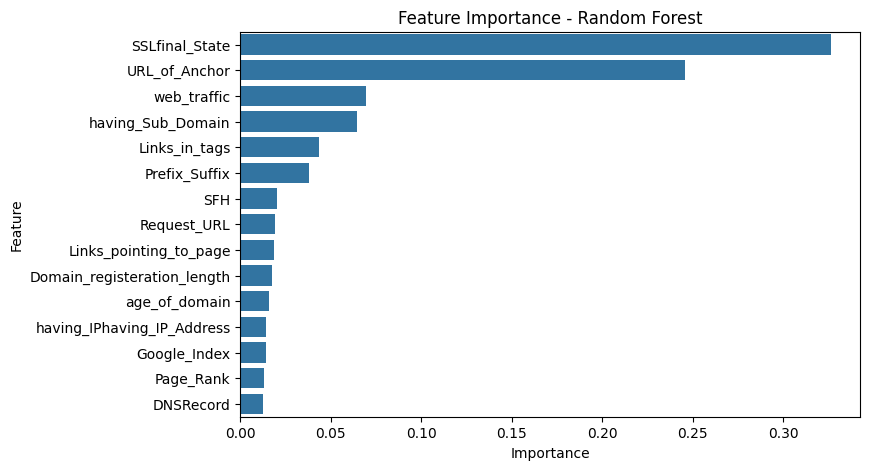

In [44]:
rf_importance = model.feature_importances_

rf_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=rf_df.head(15))
plt.title("Feature Importance - Random Forest")
plt.show()

### XGBoost – Feature Importance

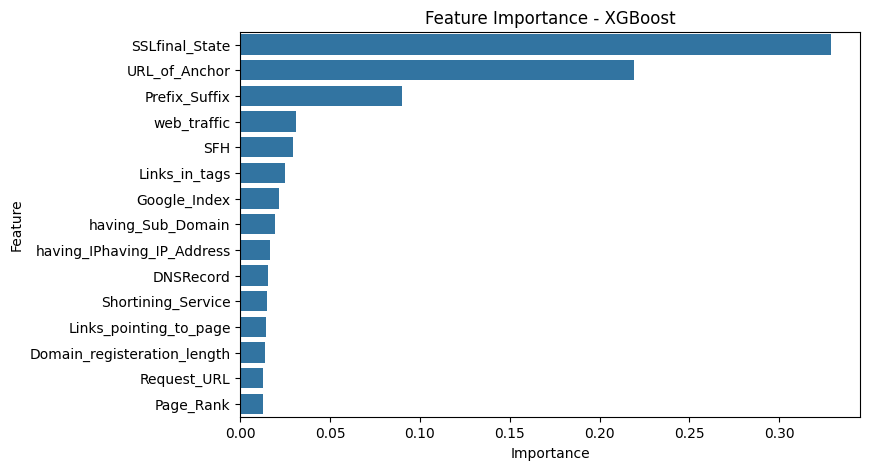

In [46]:
xgb_importance = xgb_model.feature_importances_

xgb_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=xgb_df.head(15))
plt.title("Feature Importance - XGBoost")
plt.show()

### Gradient Boosting – Feature Importance

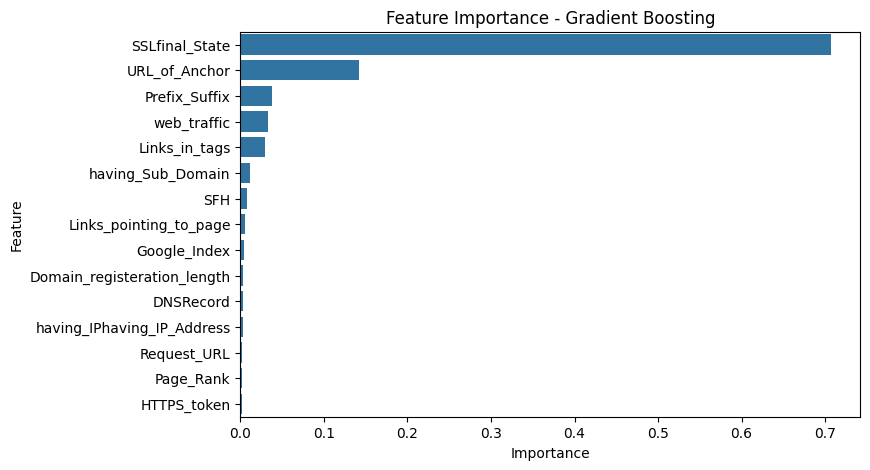

In [48]:
gb_importance = gb_model.feature_importances_

gb_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': gb_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=gb_df.head(15))
plt.title("Feature Importance - Gradient Boosting")
plt.show()

### AdaBoost – Feature Importance

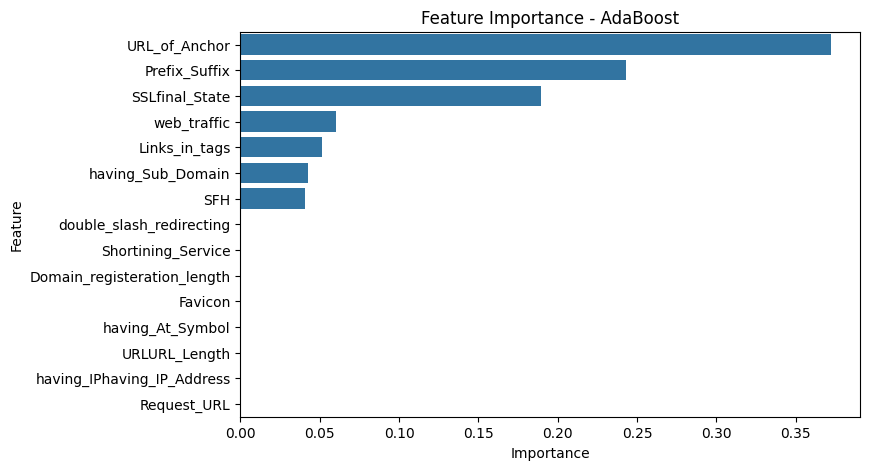

In [49]:
ada_importance = ada_model.feature_importances_

ada_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': ada_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=ada_df.head(15))
plt.title("Feature Importance - AdaBoost")
plt.show()